## Divorce prediction using Factor Analysis

In [3]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
# Load the files
df = pd.read_csv('divorce.csv')
df.shape

(170, 55)

In [5]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Columns: 55 entries, Sorry_end to Divorce_Y_N
dtypes: int64(55)
memory usage: 73.2 KB


Values in all columns have integer data type

In [6]:
# Visualize the missing values in data
import missingno as msno
msno.matrix(df)

ModuleNotFoundError: No module named 'missingno'

The data doesnt contain any null values.

### EDA

The dataset contains the rating given by person to his/her spouse based on 55 different questions asked related to marriage life. 

And, the person has to rate from 0 - 4, with 0 being lowest and 4 being highest

In [7]:
# Define list of column names
que = ['column1', 'column2', 'column3', ...]

# Descriptive statistics
values = dict()
que_cols = df.drop('Divorce_Y_N',axis=1).columns
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))
    
que_rate_df = pd.DataFrame(values).rename(columns=dict(zip(que_cols,que))).T
que_rate_df = que_rate_df[range(5)]

print(" -> Yellow highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")
# Highlighting the max & min value
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'yellow',axis=1)\
      .highlight_min(color = 'lightgreen',axis=1)

 -> Yellow highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,1,2,3,4
column1,40.6%,5.3%,8.2%,27.6%,18.2%
column2,34.7%,13.5%,16.5%,22.4%,12.9%
column3,30.0%,14.1%,15.3%,30.6%,10.0%
Ellipsis,44.1%,7.1%,17.6%,18.8%,12.3%
Special_time,48.2%,5.9%,4.7%,25.9%,15.3%
No_home_time,50.6%,28.8%,17.1%,2.4%,1.2%
2_strangers,67.1%,24.7%,2.9%,2.4%,2.9%
enjoy_holiday,47.6%,5.9%,12.3%,21.8%,12.3%
enjoy_travel,49.4%,4.1%,7.7%,28.8%,10.0%
common_goals,36.5%,10.6%,22.4%,20.0%,10.6%


#### How to infer from the above summary?

For last question - **I'm not afraid to tell my spouse about her/his incompetence** - **33.5% people rated 4 while 8.8% people rated 3**

Text(0.5, 1.0, 'Correlation value between ratings given for questions')

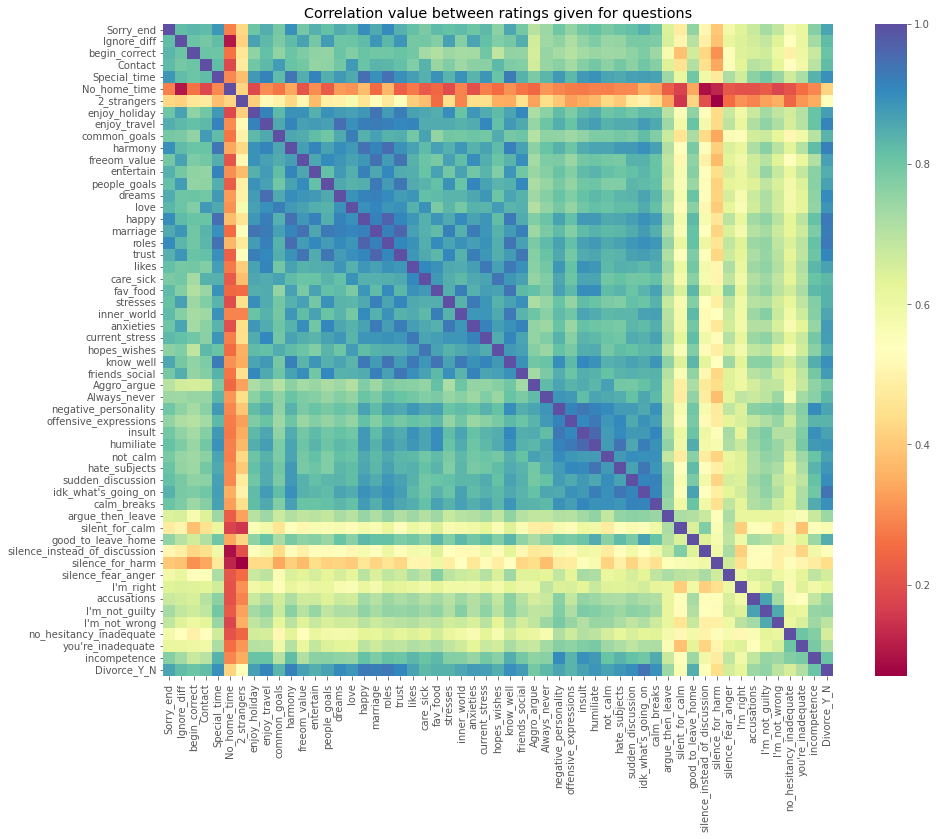

In [8]:
# Correlation study
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='Spectral')
plt.title("Correlation value between ratings given for questions")

Since most of the features are correlated with each other, its better to factor analysis

### Factor Analysis

Factor analysis is a linear statistical model, that is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms. Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables. ([Source](https://www.datacamp.com/community/tutorials/introduction-factor-analysis))

### Why Factor Analysis and not PCA?

1. Both Principal Components Analysis (PCA) and Factor Analysis are dimension reduction techniques.
2. Principal Component analysis makes the components that are completely orthogonal to each other whereas Factor analysis does not require such the factors to be orthogonal
3. Principal Components is primarily an exploratory technique to rationalize the number of variables in an analysis (for further causal analysis). Factor analysis, on the other hand, is approached with a prior knowledge or belief that which variables may be similar and therefore should load on a single factor. Factor analysis is thus a popular variable reduction technique in market research.

### Test to check for adequacy

The following tests are used to check the adequacy to apply factor analysis to the dataset. 

**1. BARTLETT’S TEST OF SPHERICITY**

**2. KAISER-MEYER-OLKIN (KMO) TEST**

Reference - [Analytics vidhya](https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/)

#### Bartlett's test of sphericity

H0 : Correlation matrix is an Identical matrix

H1 : Correlation matrix is not Identical matrix

In [9]:
!pip install factor_analyzer

In [13]:
data = df.drop('Divorce_Y_N',axis=1)

In [14]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2,p = calculate_bartlett_sphericity(data)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  17606.430077903235
p value :  0.0


**The p-value < 0.05, correlation is present among the variables with 95% confidence interval**

### KMO Test

KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions are expected as it represents more correlation is present among the variables thereby giving way for the application of dimensionality reduction techniques such as Factor Analysis. **KMO score is always between 0 to 1 and values more than 0.6 are much appreciated.**

In [15]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars,kmo_model = calculate_kmo(data)
print(kmo_model)

0.9643724872807456


**KMO score is close to 1, thus applying factor analysis can be effective for the dataset.**

In [16]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None)
fa.fit(data)
ev,v =fa.get_eigenvalues()
ev

array([4.01756867e+01, 2.16531589e+00, 1.41651436e+00, 1.19405368e+00,
       8.96249766e-01, 7.88897467e-01, 6.98636632e-01, 5.95362778e-01,
       5.68366461e-01, 5.29115848e-01, 4.28671399e-01, 3.90369411e-01,
       3.62469358e-01, 3.19198119e-01, 2.83031788e-01, 2.70341457e-01,
       2.52520084e-01, 2.20402276e-01, 2.02203198e-01, 1.91133304e-01,
       1.75596029e-01, 1.65126304e-01, 1.38913064e-01, 1.32199503e-01,
       1.19176457e-01, 1.07826952e-01, 1.03507589e-01, 1.00321611e-01,
       9.48779953e-02, 8.83932265e-02, 7.82819003e-02, 7.10819919e-02,
       6.61273710e-02, 6.21878385e-02, 5.42665704e-02, 5.37969531e-02,
       5.01311101e-02, 4.64030261e-02, 3.99427933e-02, 3.83918809e-02,
       3.53348952e-02, 3.01372243e-02, 2.80488023e-02, 2.49852654e-02,
       2.17052887e-02, 2.16659686e-02, 1.81846648e-02, 1.60713319e-02,
       1.50625288e-02, 1.31196938e-02, 1.19387963e-02, 1.10997856e-02,
       9.73035916e-03, 7.82527366e-03])

In [22]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None)
fa.fit(data,25)
ev,v =fa.get_eigenvalues()
ev

array([4.01756867e+01, 2.16531589e+00, 1.41651436e+00, 1.19405368e+00,
       8.96249766e-01, 7.88897467e-01, 6.98636632e-01, 5.95362778e-01,
       5.68366461e-01, 5.29115848e-01, 4.28671399e-01, 3.90369411e-01,
       3.62469358e-01, 3.19198119e-01, 2.83031788e-01, 2.70341457e-01,
       2.52520084e-01, 2.20402276e-01, 2.02203198e-01, 1.91133304e-01,
       1.75596029e-01, 1.65126304e-01, 1.38913064e-01, 1.32199503e-01,
       1.19176457e-01, 1.07826952e-01, 1.03507589e-01, 1.00321611e-01,
       9.48779953e-02, 8.83932265e-02, 7.82819003e-02, 7.10819919e-02,
       6.61273710e-02, 6.21878385e-02, 5.42665704e-02, 5.37969531e-02,
       5.01311101e-02, 4.64030261e-02, 3.99427933e-02, 3.83918809e-02,
       3.53348952e-02, 3.01372243e-02, 2.80488023e-02, 2.49852654e-02,
       2.17052887e-02, 2.16659686e-02, 1.81846648e-02, 1.60713319e-02,
       1.50625288e-02, 1.31196938e-02, 1.19387963e-02, 1.10997856e-02,
       9.73035916e-03, 7.82527366e-03])

In [13]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(data)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [14]:
# Factor Loadings

fa.loadings_

floading=pd.DataFrame(fa.loadings_)
floading

,0,1,2,3,4
0,0.698027,0.415375,0.251573,0.221070,0.190562
1,0.799304,0.312126,0.248137,0.007242,0.249143
2,0.685239,0.362436,0.142554,0.229959,0.270391
3,0.721785,0.372486,0.181268,0.174657,0.242710
4,0.660066,0.506009,0.377305,0.198270,0.168693
5,0.087527,0.188128,0.079898,0.574254,-0.039732
6,0.433963,0.017474,-0.018941,0.567000,0.249501
7,0.779464,0.399979,0.314565,0.054577,0.152865
8,0.724568,0.405889,0.343090,0.273173,0.175023
9,0.767630,0.352012,0.183620,0.240463,0.133885


In [16]:
# Factor Scores

fscore = fa.transform(data)

fscore_data=pd.DataFrame(fscore)
fscore_data

,0,1,2,3,4
0,-1.218824,0.254049,-0.918586,1.065917,1.879109
1,1.364118,-1.478401,-0.978084,1.841184,2.791804
2,1.024826,-1.338088,-0.240457,2.853335,-1.284975
3,0.937531,-1.154742,-0.886299,2.441000,1.482047
4,0.162689,-1.245264,0.172619,-0.777129,0.192902
...,...,...,...,...,...
165,-1.344899,2.082883,-2.521696,-0.447862,0.814576
166,-1.664267,0.239043,0.477993,0.221637,-0.061855
167,-0.270057,-0.700758,-0.118505,-0.343368,-0.620576
168,-1.108663,-0.683755,0.549004,-0.423529,1.085138


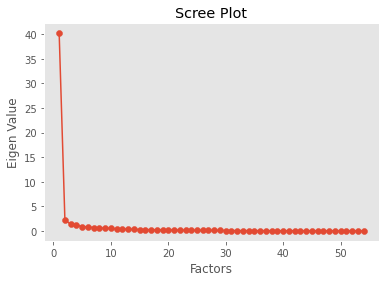

In [19]:
from factor_analyzer import FactorAnalyzer
n = data.shape[1]
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=n)
fa.fit(data)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,n+1),ev)

plt.plot(range(1,n+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

### Factor Loading

Factor loading can tell us how each factor created is explaining each of the variable. More value says that factor explains well about that variable. Sorting the factor load values helps us understand which variables are grouped to represent a new factor.

In [20]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(data)
fa_load = pd.DataFrame(fa.loadings_,index=data.columns)

In [33]:
def highlight_max(s):
    # Get 5 largest values of the column
    is_large = s.nlargest(10).values
    # Apply style is the current value is among the 5 biggest values
    return ['background-color: yellow' if v in is_large else '' for v in s]

fa_load.sort_values(by=0,ascending=False).style.apply(highlight_max)

,0,1,2,3,4
marriage,0.836865,0.327699,0.292841,0.200275,0.154872
freeom_value,0.828267,0.310767,0.248492,0.167567,0.151989
anxieties,0.805294,0.348423,0.351402,0.059615,0.078859
trust,0.804204,0.380394,0.284953,0.160955,0.201407
people_goals,0.801431,0.333058,0.297584,0.118715,0.132737
Ignore_diff,0.799304,0.312126,0.248137,0.007242,0.249143
enjoy_holiday,0.779464,0.399979,0.314565,0.054577,0.152865
love,0.773158,0.329500,0.264030,0.300530,0.150878
stresses,0.773062,0.367266,0.351396,0.042589,0.140685
common_goals,0.767630,0.352012,0.183620,0.240463,0.133885


In [22]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4
Variance          20.309095  12.237167  7.698707  2.489724  1.823363
Proportional Var   0.376094   0.226614  0.142569  0.046106  0.033766
Cumulative Var     0.376094   0.602709  0.745277  0.791383  0.825149


**The new 5 factors created can explain 82.5% variance in the data.**

### Model Prediction

In [23]:
X = data.copy()
y = df['Divorce_Y_N'].copy()
X.shape, y.shape

((170, 54), (170,))

In [24]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=5, random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(170, 5)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

k = 5
model = LogisticRegression()
scores = cross_val_score(model,X_transformed,y,cv=k)
print(f"{k} fold - cross validated scores - {scores}")
print(f"Average accuracy scores - {scores.mean()}")

5 fold - cross validated scores - [0.88235294 1.         1.         1.         1.        ]
Average accuracy scores - 0.9764705882352942


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.5,stratify=y,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85, 5), (85, 5), (85,), (85,))

In [27]:
# Build classification model
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [28]:
# Prediction
y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.95      0.98        42

    accuracy                           0.98        85
   macro avg       0.98      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



In [30]:
model.coef_

array([[ 3.08152118,  0.37168413,  0.34749321,  0.15738698, -0.06135314]])

**By looking at the coeff, factor 0 is most significant feature that predicts the divorce**

### Find the Optimal no of factors based on train-test accuracy

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []
cv_scores = []

for f in range(2,54):
    transformer = FactorAnalysis(n

In [31]:
_components=f, random_state=0)
    X_transformed = transformer.fit_transform(X)
    
    model = LogisticRegression()
    scores = cross_val_score(model,X_transformed,y,cv=5)
    cv_score = scores.mean()
    X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.5,stratify=y,random_state=100)
    
    model.fit(X_train,y_train)
    
    y_pred_tr = model.predict(X_train)
    y_pred_ts = model.predict(X_test)
    
    tr_acc = accuracy_score(y_train,y_pred_tr)
    ts_acc = accuracy_score(y_test,y_pred_ts)
    
    train_acc.append(tr_acc)
    test_acc.append(ts_acc)
    cv_scores.append(cv_score)

Text(0.5, 1.0, 'Factor analysis - Train acc vs Test acc vs CV score')

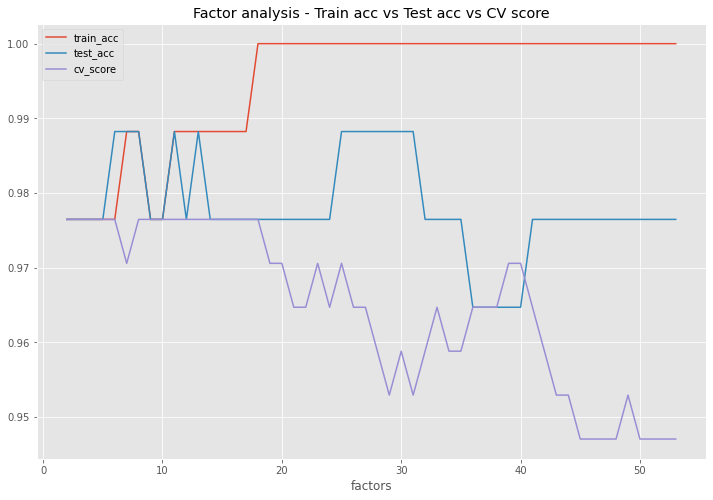

In [32]:
pd.DataFrame({'factors':range(2,54),
              'train_acc':train_acc,
              'test_acc':test_acc,
              'cv_score':cv_scores}).set_index('factors').plot(figsize=(12,8))
plt.title("Factor analysis - Train acc vs Test acc vs CV score")

**By looking at the graph, the optimal number of factors can be decided between 5 - 14**     
**As number of factors increases, the difference between train and test accuracy increases, which clearly indicates the overfitting**

**END OF NOTEBOOK**